# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 2. Import Dataset

In [2]:
df = pd.read_csv('data/house_price.csv', index_col= 'ID')

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
df = df.rename(columns= {'black': 'b'})

# 3. Exploratory Data Analysis (EDA)

### Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  b        333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


In [5]:
df.shape

(333, 14)

###  Check Missing Value

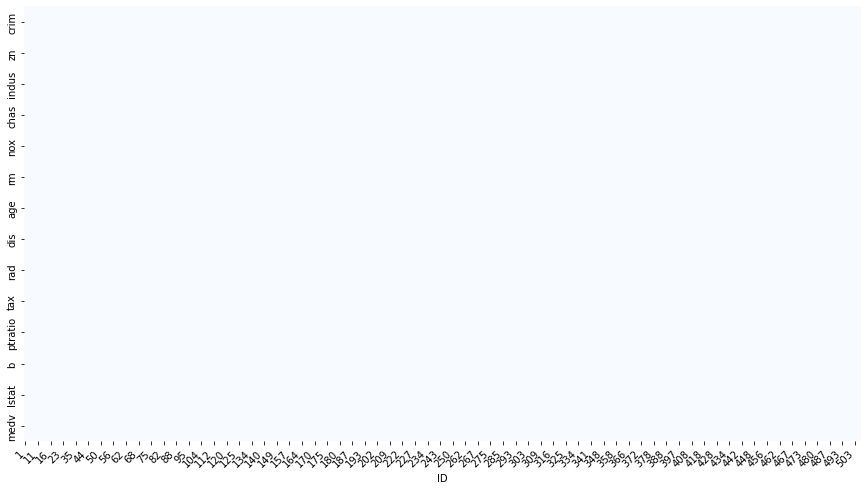

In [6]:
plot_missing_value(df)

`The dataset is clean from missing value`

### Data Description

In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


## A. Numerical Features

### Target Variable Distribution

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medv'>

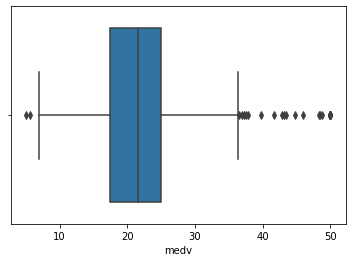

In [8]:
sns.boxplot(df['medv'])

### Numeric Variable Distribution

In [9]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

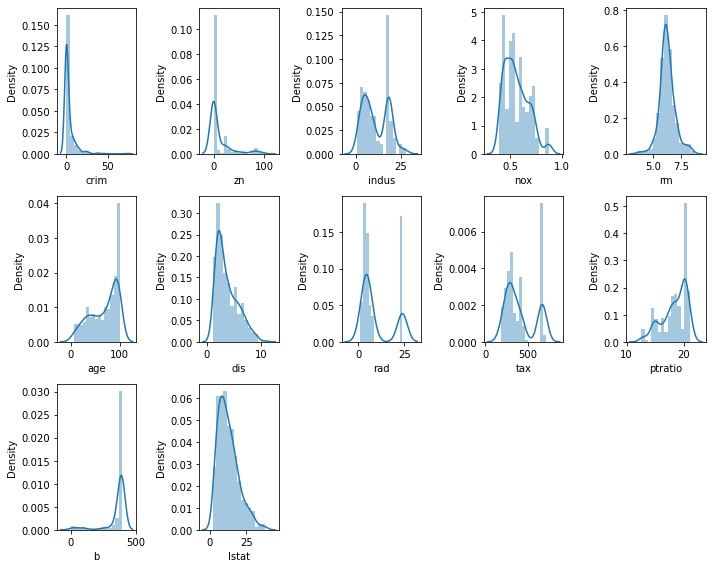

In [10]:
numeric = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
           'ptratio', 'b', 'lstat']

x = plt.figure(figsize=(10, 8))

for i, j in enumerate(numeric):
    x.add_subplot(3, 5, i+1)
    sns.distplot(df[j], bins=15)
    x.tight_layout()

plt.tight_layout()

`Although several columns have a skew, I don't handle it because maybe the number of value supposed to be. But, if the model has higher value of error, I'll handle that in the evaluation part.`

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

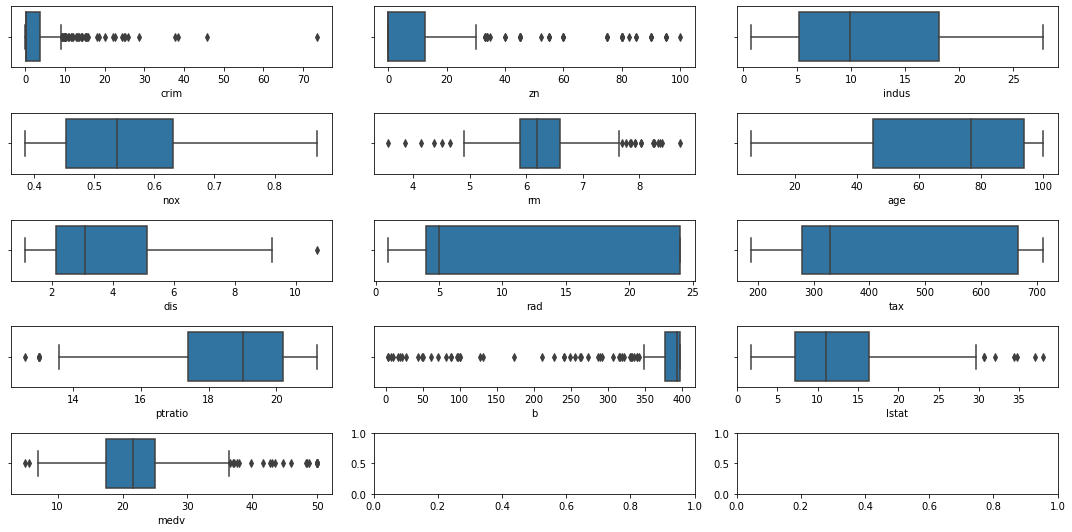

In [11]:
fig, axs = plt.subplots(5,3, figsize = (15,7.5))
sns.boxplot(df['crim'], ax = axs[0,0])
sns.boxplot(df['zn'], ax = axs[0,1])
sns.boxplot(df['indus'], ax = axs[0,2])
sns.boxplot(df['nox'], ax = axs[1,0])
sns.boxplot(df['rm'], ax = axs[1,1])
sns.boxplot(df['age'], ax = axs[1,2])
sns.boxplot(df['dis'], ax = axs[2,0])
sns.boxplot(df['rad'], ax = axs[2,1])
sns.boxplot(df['tax'], ax = axs[2,2])
sns.boxplot(df['ptratio'], ax = axs[3,0])
sns.boxplot(df['b'], ax = axs[3,1])
sns.boxplot(df['lstat'], ax = axs[3,2])
sns.boxplot(df['medv'], ax = axs[4,0])


plt.tight_layout()
plt.show()

`Although many columns have outliers, I don’t handle them yet because the values might supposed to be like that. But, if the model has higher value of error, I’ll handle in the evaluation part`

## Correlation Matrix

In [12]:
from jcopml.plot import plot_correlation_matrix

In [13]:
plot_correlation_matrix(df,target_col='medv', numeric_col='auto')

interactive(children=(ToggleButtons(description='method', options=('spearman', 'kendall', 'pearson', 'pearson_…

`Because Github can't display the correlation plot, I've captured a picture of it.`

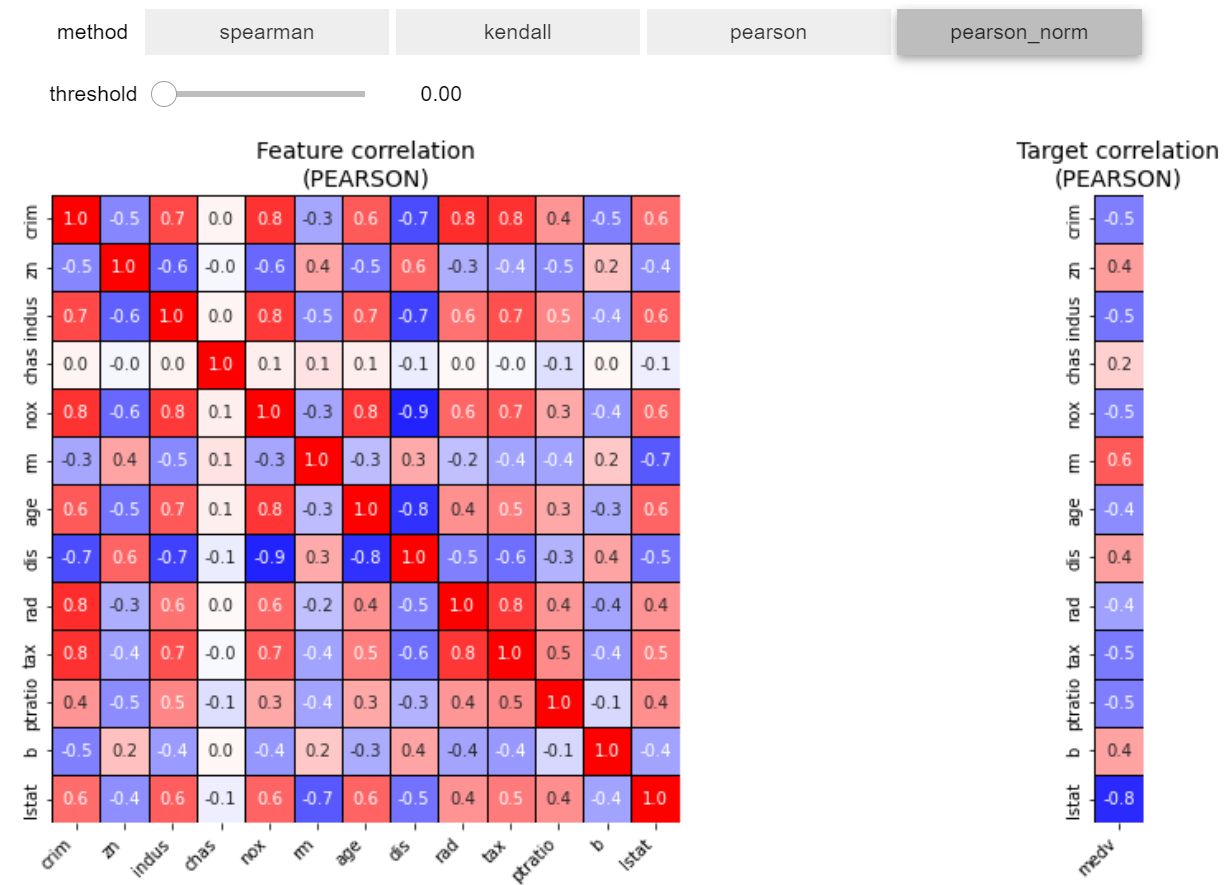

`The plot of the correlation matrix explains several columns have a strong positive and negative correlation on the target variable by using Pearson normalization. I set a threshold is 0.5`

**Positive Correlation**
1. rm

**Negatvie Correlation**
1. crim
2. indus
3. tax
4. ptratio
5. lstat

## Positive Correlation

### rm vs medv

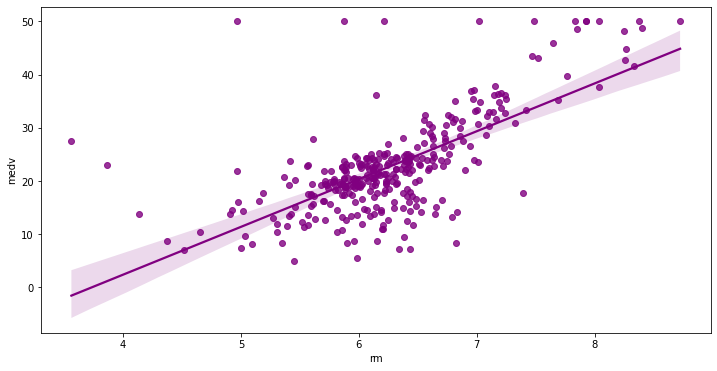

In [14]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='rm', y = 'medv', color= 'purple', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

## Negative Correlation

### crim vs medv

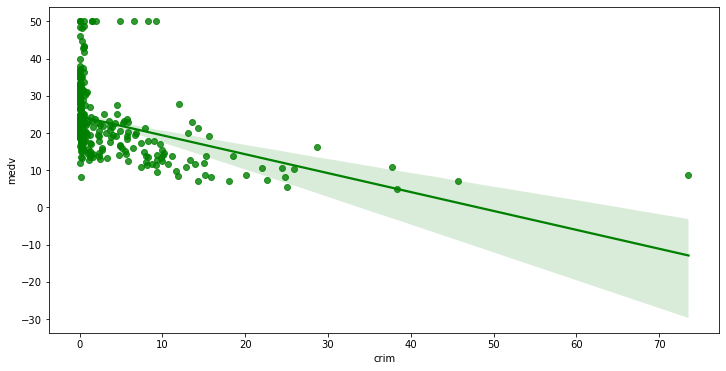

In [15]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='crim', y = 'medv', color= 'g', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### indus vs medv

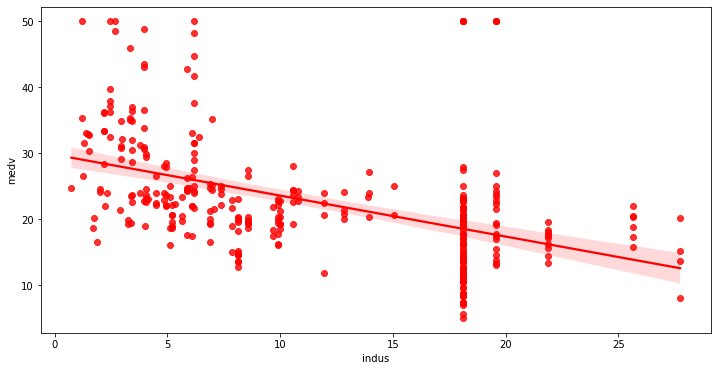

In [16]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='indus', y = 'medv', color= 'r', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### tax vs medv

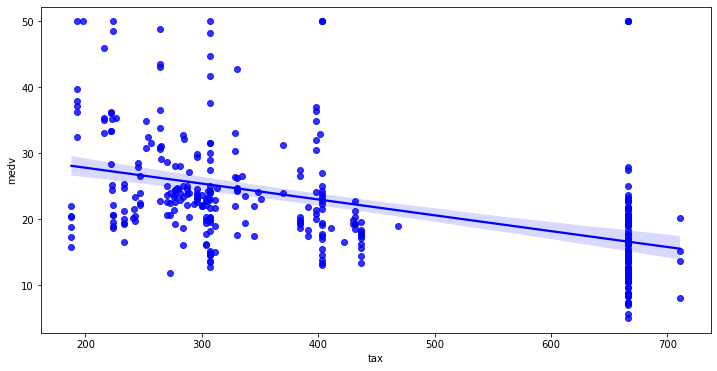

In [17]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='tax', y = 'medv', color= 'b', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### ptratio vs medv

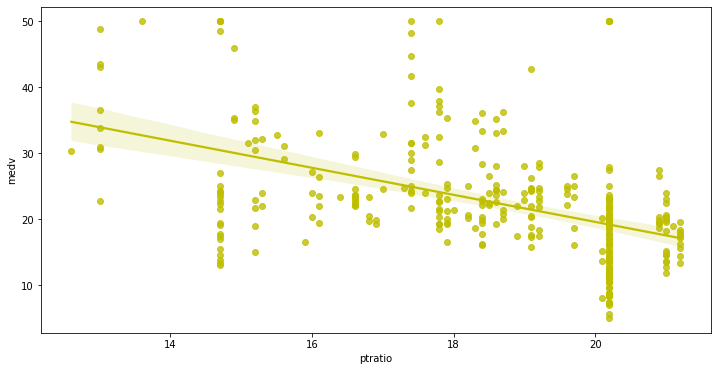

In [18]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='ptratio', y = 'medv', color= 'y', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### lstat vs medv

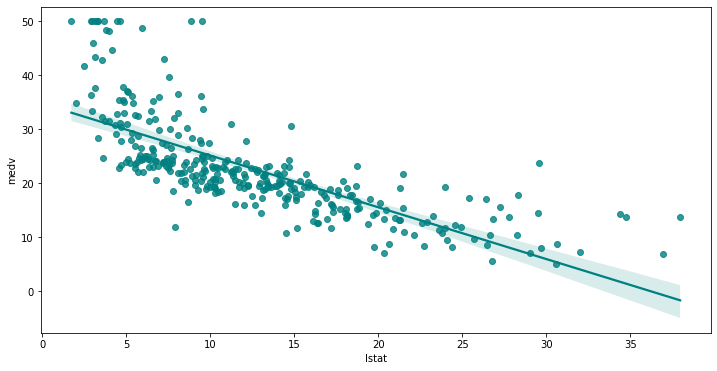

In [19]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='lstat', y = 'medv', color= 'teal', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

## B. Categorical Features

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chas', ylabel='count'>

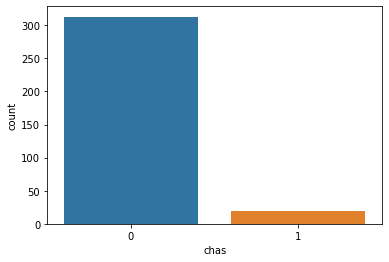

In [20]:
sns.countplot('chas', data = df)

**Insight**

`1. More houses not crossed by the charles river` <br>

# 4. Dataset Splitting

In [21]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [22]:
X = df.drop(columns="medv")
y = df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((266, 13), (67, 13), (266,), (67,))

# 5. Modeling

In [23]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [24]:
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [25]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['crim', 'zn', 'indus','nox', 'rm', 'age', 'dis', 'rad', 'ptratio', 'b', 'lstat','tax']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=5, n_iter=150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__colsample_bytree': 0.9555464322438006, 'algo__gamma': 3, 'algo__learning_rate': 0.09683922731886012, 'algo__max_depth': 5, 'algo__n_estimators': 168, 'algo__reg_alpha': 0.014888230597983571, 'algo__reg_lambda': 0.020637552043950225, 'algo__subsample': 0.6362592280385193}
0.9954519936935212 0.8645812345697037 0.928709935754986


# 6. Feature Importance

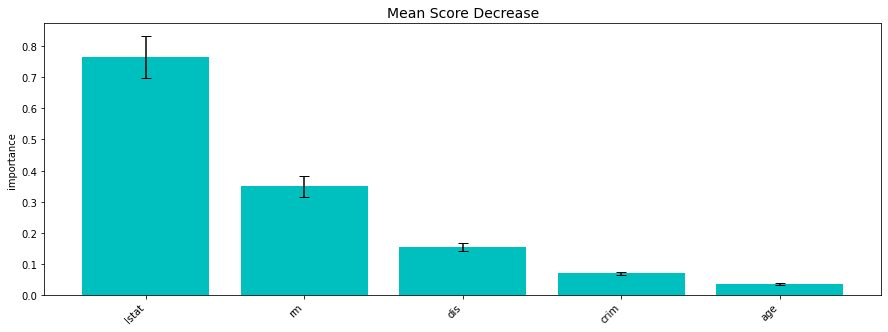

In [26]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=5)

`Lower status of population have a higher influence house price in Boston.`

In [27]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['lstat', 'rm', 'dis', 'crim', 'age'])])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=5, n_iter=150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__colsample_bytree': 0.8533710916327265, 'algo__gamma': 4, 'algo__learning_rate': 0.2742153805224403, 'algo__max_depth': 7, 'algo__n_estimators': 198, 'algo__reg_alpha': 6.269417448168366, 'algo__reg_lambda': 0.03860090547666644, 'algo__subsample': 0.7770434682698166}
0.9818567351633516 0.8201036198008508 0.923908028304783


`So Feature Importance is decreased test scores more than models that don't. Thus, I'll keep take all of columns`

# 7. Polynomial Features

In [28]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=3), ['crim', 'zn', 'indus','nox', 'rm', 'age', 'dis', 'rad', 'ptratio', 'b', 'lstat','tax']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.xgb_poly_params, cv=5, n_iter=150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__colsample_bytree': 0.3887020584745623, 'algo__gamma': 6, 'algo__learning_rate': 0.24639143878281147, 'algo__max_depth': 3, 'algo__n_estimators': 119, 'algo__reg_alpha': 0.02012962205342508, 'algo__reg_lambda': 0.007602635868455894, 'algo__subsample': 0.655574766219009, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': True}
0.9937005573834155 0.8767711575337819 0.8443431751745366


`Polynomial feature has decreased test scores more than models that don't`

# 8. Hyperparameter Tuning

In [29]:
from jcopml.tuning.space import Integer, Real

In [30]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(transform= 'yeo-johnson'), ['crim', 'zn', 'indus','nox', 'rm', 'age', 'dis', 'rad', 'ptratio', 'b', 'lstat','tax']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


parameter = {'algo__max_depth': Integer(low=1, high=10),
             'algo__learning_rate': Real(low=-4, high=0, prior='log-uniform'),
             'algo__n_estimators': Integer(low=150, high=300),
             'algo__subsample': Real(low=0, high=1, prior='uniform'),
             'algo__gamma': Integer(low=1, high=12),
             'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
             'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
             'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform')}


model = RandomizedSearchCV(pipeline, parameter, cv=5, n_iter=150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


{'algo__colsample_bytree': 0.9611207966138108, 'algo__gamma': 4, 'algo__learning_rate': 0.0196676083994431, 'algo__max_depth': 5, 'algo__n_estimators': 218, 'algo__reg_alpha': 0.3858526998477991, 'algo__reg_lambda': 0.020637552043950225, 'algo__subsample': 0.6725184560770385}
0.9847207142747056 0.8505239510368808 0.9339371260804242


# 9. Evaluation 

In [31]:
from jcopml.plot import plot_residual
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


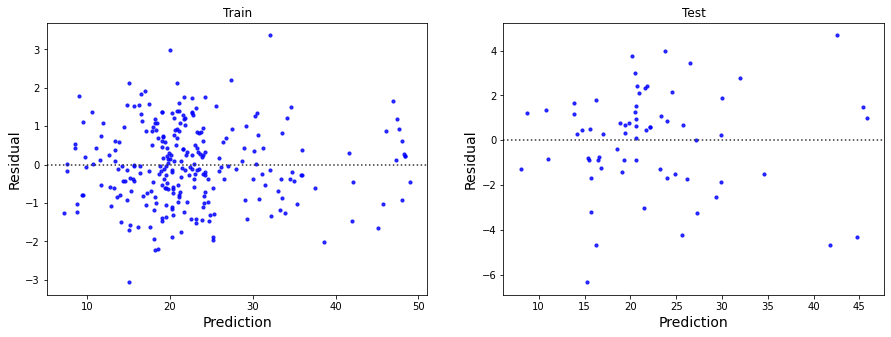

In [32]:
plot_residual(X_train, y_train, X_test, y_test, model)

`The residual plot is good enough.`

## Error Checking

In [33]:
df_analysis1 = X_test.copy()
df_analysis1['pred']  = model.predict(X_test)
df_analysis1['actual'] = y_test
df_analysis1['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis1.sort_values('error', ascending=False).head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,pred,actual,error
ID,,,,,,,,,,,,,,,,
162,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,42.527218,50.0,7.472782
491,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,15.242694,8.1,7.142694
428,37.66190,0.0,18.10,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,16.258131,10.9,5.358131
167,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,45.368187,50.0,4.631813
214,0.14052,0.0,10.59,0,0.489,6.375,32.3,3.9454,4,277,18.6,385.81,9.38,23.809488,28.1,4.290512
164,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,45.793571,50.0,4.206429
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,32.022060,36.2,4.177940
267,0.78570,20.0,3.97,0,0.647,7.014,84.6,2.1329,5,264,13.0,384.07,14.79,26.550644,30.7,4.149356
435,13.91340,0.0,18.10,0,0.713,6.208,95.0,2.2222,24,666,20.2,100.63,15.17,15.657881,11.7,3.957881


`There is no significant error values to be handled`

# 10. Summary Result

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('R2 Train :', r2_score(y_train, y_pred_train))
print('R2 Test :', r2_score(y_test, y_pred_test))
print('MAE Train :', mean_absolute_error(y_train, y_pred_train))
print('MAE Test :', mean_absolute_error(y_test, y_pred_test))
print('MSE Train :', mean_squared_error(y_train, y_pred_train))
print('MSE Test :', mean_squared_error(y_test, y_pred_test))
print('RMSE Train :', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE Test :', mean_squared_error(y_test, y_pred_test, squared=False))

R2 Train : 0.9847207142747056
R2 Test : 0.9339371260804242
MAE Train : 0.8936601215735415
MAE Test : 1.8445480289743907
MSE Train : 1.257704337199907
MSE Test : 5.94555181015441
RMSE Train : 1.1214741803536572
RMSE Test : 2.438350223030812


# 11. Save the Model

In [36]:
save_model(model.best_estimator_, "The_Boston_Housing_Price_Prediction_XGBoost.pkl")

Model is pickled as model/The_Boston_Housing_Price_Prediction_XGBoost.pkl


____

# Try to Binning Feature

In [37]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  b        333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.1 KB


## 1. Binning tax Column

In [39]:
df['tax'] = pd.cut(df.tax, bins = np.arange(100, 750, 125), labels = ['Low', 'Medium Low', 'Medium', 'Medium High', 'High'])

In [40]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,Medium Low,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,Medium Low,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,Low,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,Low,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,Medium Low,15.2,395.60,12.43,22.9


## 2. Dataset Splitting

In [41]:
X = df.drop(columns="medv")
y = df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((266, 13), (67, 13), (266,), (67,))

## 3. Modeling

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.impute import SimpleImputer

In [43]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'ptratio', 'b', 'lstat']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas', 'tax'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=5, n_iter=150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__colsample_bytree': 0.7134523020755108, 'algo__gamma': 2, 'algo__learning_rate': 0.03321919136498462, 'algo__max_depth': 7, 'algo__n_estimators': 167, 'algo__reg_alpha': 0.5909645567877677, 'algo__reg_lambda': 0.024736965183596603, 'algo__subsample': 0.7683240759278538}
0.9945697399241605 0.8389580599193553 0.934574082692205


## 4. Feature Importance

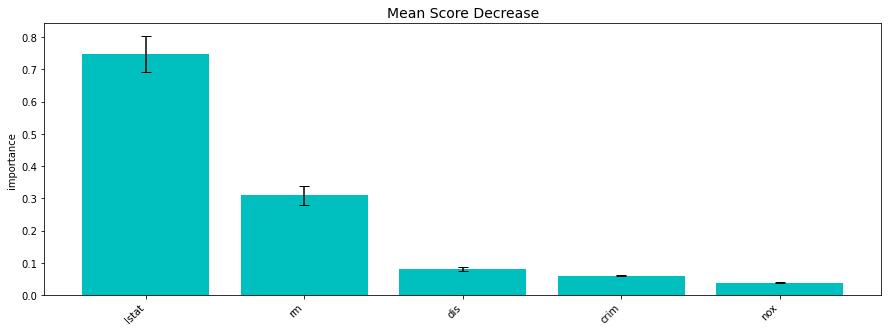

In [44]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=5)

In [45]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['lstat', 'rm', 'dis', 'crim', 'nox'])])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=5, n_iter=150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__colsample_bytree': 0.9555464322438006, 'algo__gamma': 3, 'algo__learning_rate': 0.09683922731886012, 'algo__max_depth': 5, 'algo__n_estimators': 168, 'algo__reg_alpha': 0.014888230597983571, 'algo__reg_lambda': 0.020637552043950225, 'algo__subsample': 0.6362592280385193}
0.994098001345085 0.8307539156921798 0.8990251774558445


`So Feature Importance is decreased test scores more than models that don't. Thus, I'll keep take all of columns`

## 5. Polynomial Feature

In [46]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=3), ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'ptratio', 'b', 'lstat']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas', 'tax'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.xgb_poly_params, cv=5, n_iter=150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__colsample_bytree': 0.6703827073481596, 'algo__gamma': 4, 'algo__learning_rate': 0.04289366588639892, 'algo__max_depth': 10, 'algo__n_estimators': 188, 'algo__reg_alpha': 0.5394215016249694, 'algo__reg_lambda': 0.06423835412574502, 'algo__subsample': 0.656891227427663, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': True}
0.9952679484352103 0.8728400721732303 0.8724533456741471


`Polynomial feature has decreased test scores more than models that don't`

## 6. Fine Tuning

In [47]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(transform = 'yeo-johnson'), ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'ptratio', 'b', 'lstat']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas', 'tax'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


parameter = {'algo__max_depth': Integer(low=1, high=10),
             'algo__learning_rate': Real(low=-4, high=0, prior='log-uniform'),
             'algo__n_estimators': Integer(low=150, high=300),
             'algo__subsample': Real(low=0, high=1, prior='uniform'),
             'algo__gamma': Integer(low=1, high=10),
             'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
             'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
             'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform')}


model = RandomizedSearchCV(pipeline, parameter, cv=5, n_iter=150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__colsample_bytree': 0.6649372477642761, 'algo__gamma': 8, 'algo__learning_rate': 0.05954844561178708, 'algo__max_depth': 4, 'algo__n_estimators': 164, 'algo__reg_alpha': 5.718185379219422, 'algo__reg_lambda': 0.09587260006900103, 'algo__subsample': 0.7414609111390456}
0.9711074949492283 0.839240329236478 0.9340526530281039


## 7. Evaluation 

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


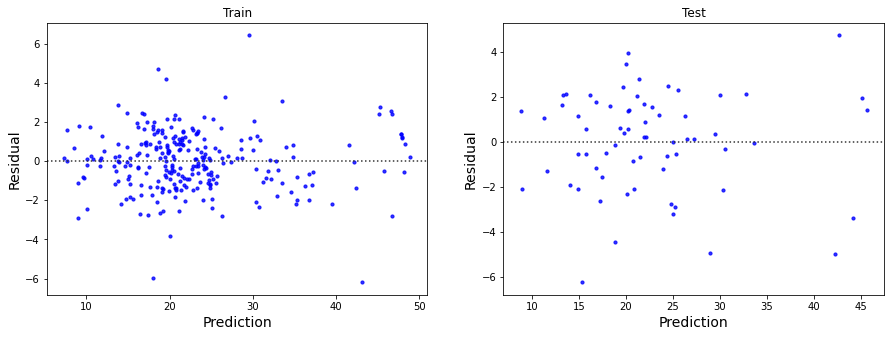

In [48]:
plot_residual(X_train, y_train, X_test, y_test, model)

`The data spread out pretty well`

### Error Checking

In [49]:
df_analysis1 = X_test.copy()
df_analysis1['pred']  = model.predict(X_test)
df_analysis1['actual'] = y_test
df_analysis1['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis1.sort_values('error').head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,pred,actual,error
ID,,,,,,,,,,,,,,,,
109,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,Medium,20.9,395.24,12.27,19.836973,19.8,0.036973
334,0.05083,0.0,5.19,0,0.515,6.316,38.1,6.4584,5,Low,20.2,389.71,5.68,22.119677,22.2,0.080323
11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,Medium Low,15.2,392.52,20.45,14.908104,15.0,0.091896
68,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,Medium Low,18.9,396.21,8.10,21.907557,22.0,0.092443
463,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,High,20.2,396.90,13.99,19.359516,19.5,0.140484
108,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,Medium,20.9,387.69,14.09,20.176901,20.4,0.223099
237,0.52058,0.0,6.20,1,0.507,6.631,76.5,4.1480,8,Medium Low,17.4,388.45,9.54,25.323555,25.1,0.223555
272,0.16211,20.0,6.96,0,0.464,6.240,16.3,4.4290,3,Low,18.6,396.90,6.59,24.966019,25.2,0.233981
458,8.20058,0.0,18.10,0,0.713,5.936,80.3,2.7792,24,High,20.2,3.50,16.94,13.143562,13.5,0.356438


## 8. Summary Result

In [50]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('R2 Train :', r2_score(y_train, y_pred_train))
print('R2 Test :', r2_score(y_test, y_pred_test))
print('MAE Train :', mean_absolute_error(y_train, y_pred_train))
print('MAE Test :', mean_absolute_error(y_test, y_pred_test))
print('MSE Train :', mean_squared_error(y_train, y_pred_train))
print('MSE Test :', mean_squared_error(y_test, y_pred_test))
print('RMSE Train :', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE Test :', mean_squared_error(y_test, y_pred_test, squared=False))

R2 Train : 0.9711074949492283
R2 Test : 0.9340526530281039
MAE Train : 1.178414489631366
MAE Test : 1.8613379350349084
MSE Train : 2.378267516443462
MSE Test : 5.935154571703431
RMSE Train : 1.5421632586867908
RMSE Test : 2.436217266933192


`So binning feature can help to increse the model performance.`

## 9. Save Model

In [51]:
save_model(model.best_estimator_, "The_Boston_Housing_Price_Prediction_XGBoost_with_Binning.pkl")

Model is pickled as model/The_Boston_Housing_Price_Prediction_XGBoost_with_Binning.pkl
